# Health Care - Health Expenditures

In [47]:
# importing the required libraries and reading the data
import pandas as pd

data_1 = pd.read_excel("Health_Expenditures_1.xlsx")

data_2 = pd.read_excel("Health_Expenditures_2.xlsx")

In [48]:
# removing the columns which have all null values
import numpy as np

data = pd.concat([data_1,data_2])
data.replace({':' : np.nan,'-': np.nan,'<': np.nan},inplace = True)

In [49]:
# removing the rows which have all null values
data = data.dropna(subset = data.columns[3:],how="all")

In [50]:
data = data.drop(columns = "Unnamed: 2")

In [51]:
data = data.drop(index =0)

In [52]:
# Reducing the dimensionality of the data by grabing all the years columns as single colum and their respective values
data = data.melt(id_vars=["Countries","Indicators"],var_name="Year",value_name="Value")

In [53]:
data



,Countries,Indicators,Year,Value
0,Malawi,Internal transfers and grants,2000,43.225362
1,Malawi,Voluntary prepayment,2000,3.187211
2,Malawi,Direct foreign transfers,2000,31.883387
3,Malawi,Government schemes and compulsory contributory...,2000,48.284705
4,Malawi,Government schemes,2000,48.284705
...,...,...,...,...
34794,Kiribati,Direct foreign transfers,2022,NaN
34795,Kiribati,Government schemes and compulsory contributory...,2022,NaN
34796,Kiribati,Government schemes,2022,NaN
34797,Kiribati,Voluntary health care payment schemes,2022,NaN


In [54]:
# using simple imputer from scikit-learn to handle the missing values
from sklearn.impute import SimpleImputer

numerical_indices = list(range(2, data.shape[1])) 

numerical_cols = data.columns[numerical_indices]

# Replacing the null values in numerical columns with mean
imputer_numerical = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_numerical.fit_transform(data[numerical_cols])

# Replacing the null values in categorical columns with most-frequent item in the feature
categorical_cols = ['Countries', 'Indicators']  # Specify categorical columns here
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Data Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_25516\2576263591.py:13: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig("Health Expenditure by Internal transfers and grants.png",dpi=72)
C:\Users\hp\anaconda3\envs\DataScience\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


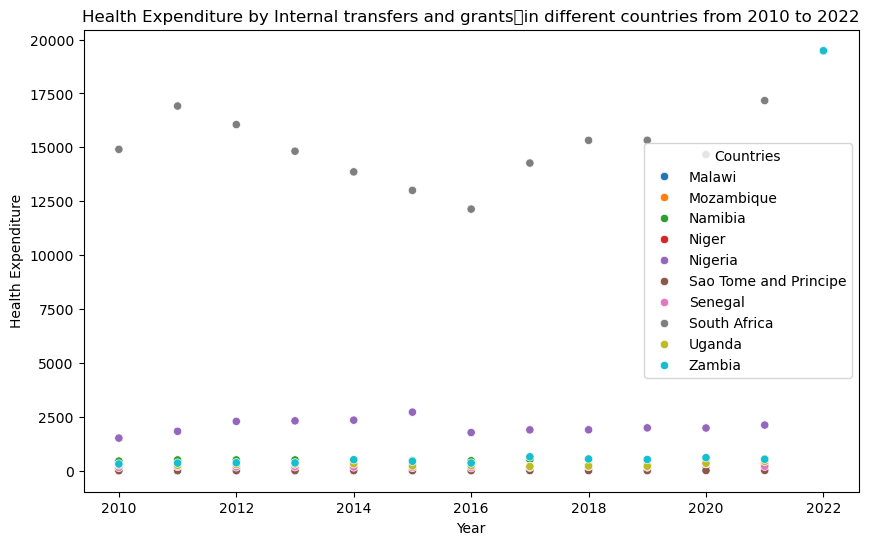

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
internal_transfers = data[data["Indicators"] == "Internal transfers and grants"]
top_countries = internal_transfers["Countries"].unique()[0:10]
latest_years = internal_transfers["Year"].unique()[10:]
internal_transfers = internal_transfers[internal_transfers["Countries"].isin(top_countries)]
internal_transfers = internal_transfers[internal_transfers["Year"].isin(latest_years)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data = internal_transfers,x="Year",y="Value", hue="Countries")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.title('Health Expenditure by Internal transfers and grants	in different countries from 2010 to 2022')
plt.savefig("Health Expenditure by Internal transfers and grants.png",dpi=72)
plt.show()

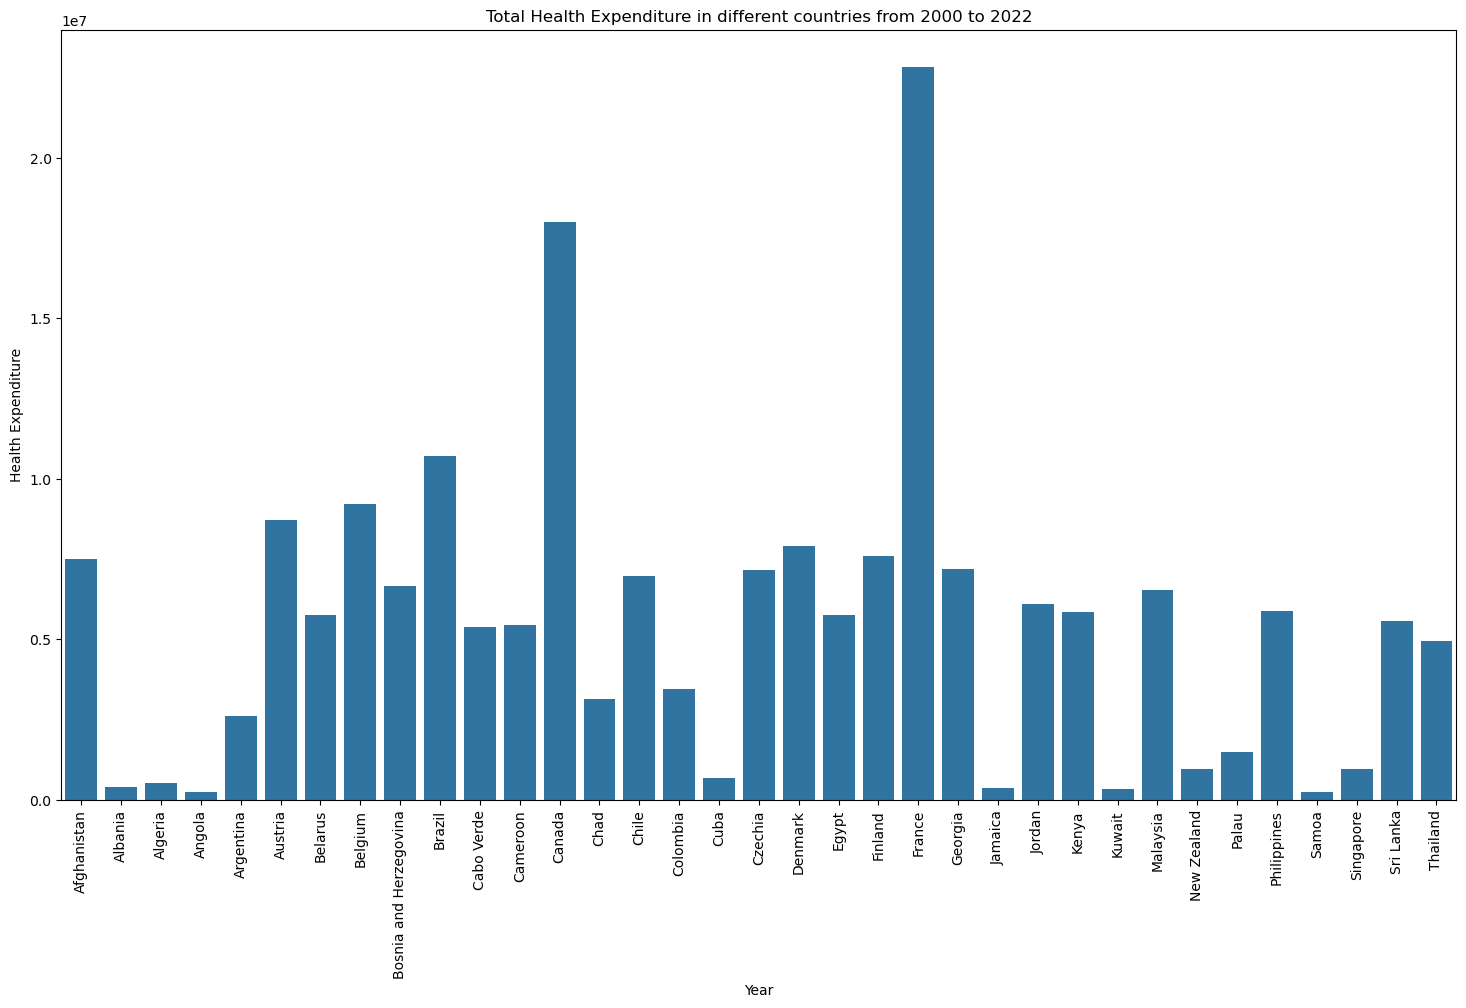

In [56]:
different_countries = data["Countries"].unique()[30:65]
countries = data[data["Countries"].isin(different_countries)]
sums = countries.groupby("Countries")["Value"].sum().reset_index()
plt.rcParams["figure.figsize"] = (18, 10)
sns.barplot(data = sums,x="Countries",y="Value")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.title('Total Health Expenditure in different countries from 2000 to 2022')
plt.xticks(rotation=90)
plt.savefig("Total Health Expenditure in different countries.png",dpi=72)
plt.show()

In [57]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['Countries'] = Le.fit_transform(data['Countries'])
data['Indicators'] = Le.fit_transform(data['Indicators'])

In [58]:
# Applying the standardization to the numerical features such that all the features will be on same scale which is required for the model to perform analysis effectively
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

data[['Year']] = standardscaler.fit_transform(data[['Year']])
data[['Value']] = standardscaler.fit_transform(data[['Value']])

In [59]:
# Arranging the columns in desired order
data = data[[data.columns[0]] + data.columns.tolist()[2:]+  [data.columns[1]]]

In [60]:
# Identifying the outliers using IQR and removing them
Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Value'] >= (Q1 - 1.5 * IQR)) & (data['Value'] <= (Q3 + 1.5 * IQR))]


In [61]:
# Visualizing the data after preprocessing
data

,Countries,Year,Value,Indicators
0,40,-1.658312,-2.344214e-01,14
1,40,-1.658312,-2.349042e-01,32
2,40,-1.658312,-2.345581e-01,8
3,40,-1.658312,-2.343604e-01,11
4,40,-1.658312,-2.343604e-01,10
...,...,...,...,...
34794,38,1.658312,4.387175e-17,8
34795,38,1.658312,4.387175e-17,11
34796,38,1.658312,4.387175e-17,10
34797,38,1.658312,4.387175e-17,31
